# DATA PRE-PROCESSING 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

* IMPORTING DATA FROM YAHOO FINANCE : 

In [5]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
data.reset_index(inplace=True)

In [9]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495003,16.562926,16.171750,16.185882,147611217
1,2012-01-04,16.566145,16.614980,16.376260,16.485581,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.860695,96.761695,93.497158,95.089614,26452900
2757,2022-12-15,90.770065,93.586726,90.003699,93.099038,28298800
2758,2022-12-16,90.431686,91.317490,89.585695,90.770080,48485500


*Moving avg of 100 Days :*

In [11]:
ma_100_days = data.Close.rolling(100).mean()

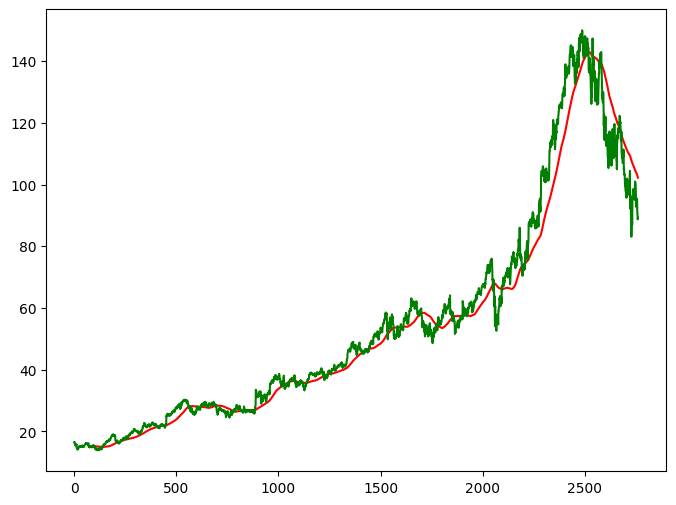

In [13]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

*Moving avg of 200 days*

In [15]:
ma_200_days = data.Close.rolling(200).mean()

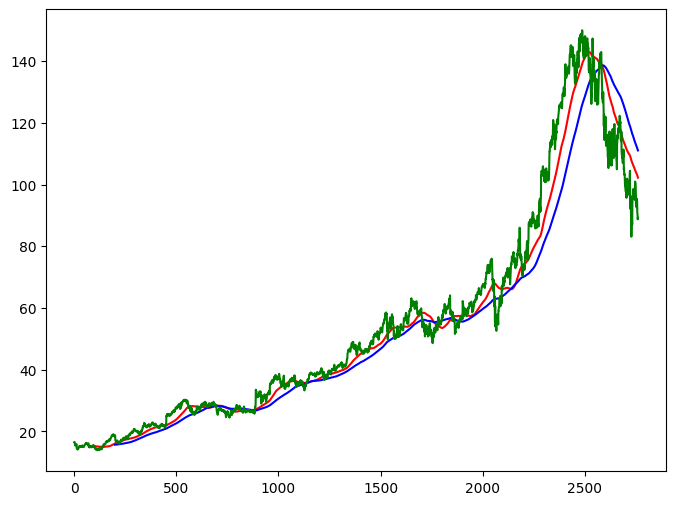

In [17]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

*Removing missing/ NUll values*

In [19]:
data.dropna(inplace=True)

* DISTRIBUTING DATA INTO 80% TRAIN & 20% TEST

In [21]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [23]:
data_train.shape[0]

2208

In [25]:
data_test.shape[0]

553

*SCALING*

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [28]:
data_train_scale = scaler.fit_transform(data_train) 

* Array slicing 

In [31]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0]) 

In [33]:
data.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495003,16.562926,16.171750,16.185882,147611217
1,2012-01-04,16.566145,16.614980,16.376260,16.485581,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981


In [35]:
x,y = np.array(x) , np.array(y) 

In [37]:
from keras.layers import Dense, Dropout, LSTM 
from keras.models import Sequential  

In [39]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True ,
              input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation= 'relu', return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4)) 

model.add(LSTM(units = 120 , activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1)) 

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.compile(optimizer = 'adam', loss='mean_squared_error') 

In [51]:
model.fit(x,y, epochs = 50, batch_size =32 , verbose=1) 

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 44s 407ms/step - loss: 0.0740
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 409ms/step - loss: 0.0087
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 416ms/step - loss: 0.0058
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 40s 403ms/step - loss: 0.0052
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 406ms/step - loss: 0.0051
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 401ms/step - loss: 0.0053
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 431ms/step - loss: 0.0044
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 438ms/step - loss: 0.0041
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 444ms/step - loss: 0.0039
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 437ms/step - loss: 0.0045
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 29s 441ms/step - loss: 0.0043
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 436ms/step - loss: 0.0036
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 436ms/step - loss: 0.0038
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 28s 424ms/step - loss: 0.0035
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 42s 

In [97]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
pas_100_days = data_train.tail(100)

In [45]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [99]:
data_test_scale = scaler.fit_transform(data_test)

In [125]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0]) 
x,y = np.array(x), np.array(y)

In [127]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step


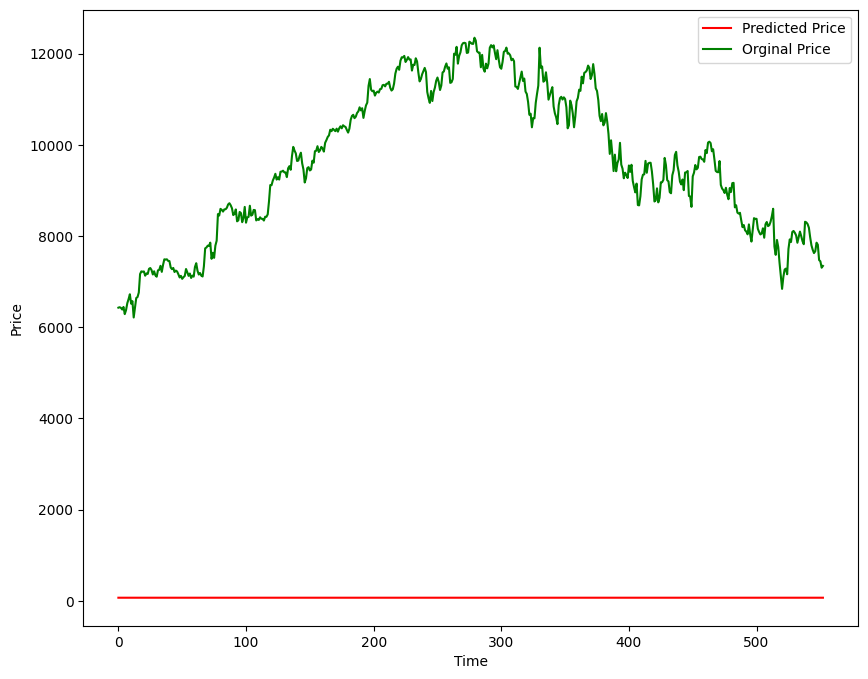

In [133]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label = 'Orginal Price')
plt.